<a href="https://colab.research.google.com/github/aparnashenoy/ml/blob/master/AIS_VesselType_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
path = '/gdrive/My Drive/'

In [3]:
!pip install pygeohash

In [4]:
import numpy as np
import pandas as pd
import pygeohash as gh
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#import file
df = pd.read_csv(path + 'ais_data_valid_mmsi_version1.csv')

In [6]:
df.head()

,Unnamed: 0,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,0,367339240,2021-09-30T00:00:02,36.99416,-89.15366,0.3,350.0,328.0,SHERRYL B REEVES,NaN,WDE3451,31.0,12.0,48.0,12.0,NaN,57.0,A
1,1,316020871,2021-09-30T00:00:02,48.70558,-123.54449,0.0,61.4,109.0,SEASPAN EAGLE,IMO9432971,CFN6642,31.0,0.0,28.0,12.0,5.3,32.0,A
2,2,368033750,2021-09-30T00:00:02,38.96336,-76.48107,0.0,360.0,281.0,OCEANAIRE,IMO0000000,WDK2245,37.0,NaN,16.0,4.0,NaN,NaN,B
3,3,338329872,2021-09-30T00:00:04,41.63435,-71.21239,0.0,360.0,511.0,POR-SHA,IMO0000000,NaN,37.0,NaN,10.0,3.0,NaN,NaN,B
4,4,338400879,2021-09-30T00:00:04,42.37885,-87.80212,12.7,202.1,511.0,LADY B,IMO0000000,NaN,37.0,NaN,17.0,5.0,NaN,NaN,B


In [7]:
df.columns

Index(['Unnamed: 0', 'MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG',
       'Heading', 'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'TransceiverClass'],
      dtype='object')

In [8]:
df.drop(['Unnamed: 0'], axis = 1, inplace =True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9106197 entries, 0 to 9106196
Data columns (total 17 columns):
 #   Column            Dtype  
---  ------            -----  
 0   MMSI              int64  
 1   BaseDateTime      object 
 2   LAT               float64
 3   LON               float64
 4   SOG               float64
 5   COG               float64
 6   Heading           float64
 7   VesselName        object 
 8   IMO               object 
 9   CallSign          object 
 10  VesselType        float64
 11  Status            float64
 12  Length            float64
 13  Width             float64
 14  Draft             float64
 15  Cargo             float64
 16  TransceiverClass  object 
dtypes: float64(11), int64(1), object(5)
memory usage: 1.2+ GB


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MMSI,9106197.0,3.675638e+08,5.505162e+07,1.121196e+08,3.668371e+08,3.674344e+08,3.677816e+08,9.989755e+08
LAT,9106197.0,3.555344e+01,7.140677e+00,4.406800e-01,2.976340e+01,3.397449e+01,4.074802e+01,5.578280e+01
LON,9106197.0,-9.344256e+01,2.030667e+01,-1.615699e+02,-9.704504e+01,-9.020203e+01,-8.014600e+01,1.458650e+02
SOG,9106197.0,2.476649e+00,6.382677e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,1.023000e+02
COG,9106197.0,2.145466e+02,1.127056e+02,0.000000e+00,1.250000e+02,2.334000e+02,3.110000e+02,3.813000e+02
Heading,9106197.0,3.658757e+02,1.775155e+02,0.000000e+00,2.100000e+02,5.110000e+02,5.110000e+02,5.110000e+02
VesselType,8941618.0,4.451484e+01,1.970765e+01,0.000000e+00,3.100000e+01,3.700000e+01,6.000000e+01,9.900000e+01
Status,6601382.0,4.229563e+00,5.665265e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.500000e+01
Length,8482324.0,5.067391e+01,6.998255e+01,0.000000e+00,1.700000e+01,2.300000e+01,4.100000e+01,5.260000e+02
Width,7458798.0,1.117246e+01,9.871699e+00,0.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01,1.260000e+02


In [11]:
df.VesselType.value_counts()

31.0    3086844
37.0    1869671
60.0     672586
70.0     634942
30.0     632441
         ...   
25.0        213
1.0         174
86.0        168
98.0        124
3.0          83
Name: VesselType, Length: 66, dtype: int64

In [12]:
df.VesselType.unique()

array([31., 37., 36., 70., 60., 90., 30., nan, 72., 57., 65., 79., 99.,
       33., 80.,  0., 52., 89., 34., 40., 50., 35., 51., 49., 47., 18.,
       69., 32., 74., 71., 54., 53., 95., 58.,  8., 56., 10., 55., 91.,
       76., 81., 67., 59.,  6.,  9., 39., 20., 66.,  7., 38., 73., 97.,
       82., 84., 83., 87., 64., 25., 94., 75.,  1., 29., 98.,  3., 68.,
       86., 77.])

In [13]:
# variable to hold the count of VesselType
#count = 0
# list to hold VesselType unique values
#VesselType_values =[]
#loop to count unique VesselType values
#for i in range(0, len(df['VesselType'])):
#  if df['VesselType'][i] not in VesselType_values:
 #   VesselType_values.append(df['VesselType'][i])
 #   count+=1
#print('No of unique VesselType values: ', count)
#print('Vessel Type unique values: ',VesselType_values)

In [14]:
vessel_type_0=(df['VesselType']==0).sum()

In [15]:
vessel_type_0

91972

In [16]:
df[df['VesselType']==0].groupby('MMSI').size().reset_index()

,MMSI,0
0,210000000,1172
1,211002010,739
2,230682000,1180
3,303250000,272
4,316001002,1240
...,...,...
129,585921080,884
130,636020277,455
131,669970719,453
132,671297100,476


In [17]:
invalid_entries=[0]
invalid = df[df.VesselType.isin(invalid_entries)]
invalid

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
111,368134480,2021-09-30T00:00:01,36.60510,-121.89227,0.2,122.1,511.0,PRINCESS MONTEREY,IMO8967632,WDL4752,0.0,15.0,27.0,8.0,0.0,0.0,A
139,669970719,2021-09-30T00:00:08,36.67008,-74.18923,7.9,3.1,511.0,US GOV VESSEL-24----,NaN,NARL---,0.0,0.0,208.0,64.0,0.0,0.0,A
234,368134280,2021-09-30T00:00:09,41.67163,-88.02666,4.6,124.3,511.0,ELYSE NOELLE,NaN,WDL4732,0.0,0.0,8.0,8.0,1.0,0.0,A
274,367413760,2021-09-30T00:00:01,47.60934,-122.34637,0.0,0.2,511.0,BAY LADY,NaN,WCZ3958,0.0,8.0,0.0,0.0,0.0,99.0,A
282,368149190,2021-09-30T00:00:03,41.41792,-71.19561,6.5,130.8,511.0,CAMDYN,IMO8993760,WDL6282,0.0,0.0,0.0,0.0,3.8,52.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9105982,368926271,2021-09-30T02:40:44,13.65210,144.49201,16.6,291.0,291.0,WARSHIP 18,NaN,NaN,0.0,0.0,121.0,32.0,0.0,35.0,A
9105983,368926271,2021-09-30T02:41:47,13.65377,144.48741,16.6,289.0,291.0,WARSHIP 18,NaN,NaN,0.0,0.0,121.0,32.0,0.0,35.0,A
9105984,368926271,2021-09-30T02:47:02,13.66204,144.46487,16.0,290.3,291.0,WARSHIP 18,NaN,NaN,0.0,0.0,121.0,32.0,0.0,35.0,A
9105985,368926271,2021-09-30T02:48:03,13.66367,144.46041,16.0,291.7,291.0,WARSHIP 18,NaN,NaN,0.0,0.0,121.0,32.0,0.0,35.0,A


In [18]:
df.drop(invalid.index,axis = 0, inplace = True)

In [19]:
df.dropna(subset=['VesselType'])

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,367339240,2021-09-30T00:00:02,36.99416,-89.15366,0.3,350.0,328.0,SHERRYL B REEVES,NaN,WDE3451,31.0,12.0,48.0,12.0,NaN,57.0,A
1,316020871,2021-09-30T00:00:02,48.70558,-123.54449,0.0,61.4,109.0,SEASPAN EAGLE,IMO9432971,CFN6642,31.0,0.0,28.0,12.0,5.3,32.0,A
2,368033750,2021-09-30T00:00:02,38.96336,-76.48107,0.0,360.0,281.0,OCEANAIRE,IMO0000000,WDK2245,37.0,NaN,16.0,4.0,NaN,NaN,B
3,338329872,2021-09-30T00:00:04,41.63435,-71.21239,0.0,360.0,511.0,POR-SHA,IMO0000000,NaN,37.0,NaN,10.0,3.0,NaN,NaN,B
4,338400879,2021-09-30T00:00:04,42.37885,-87.80212,12.7,202.1,511.0,LADY B,IMO0000000,NaN,37.0,NaN,17.0,5.0,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106173,338926439,2021-09-30T22:50:57,13.42388,144.66368,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,90.0,0.0,44.0,8.0,0.0,90.0,A
9106174,338926439,2021-09-30T22:59:07,13.42386,144.66368,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,90.0,0.0,44.0,8.0,0.0,90.0,A
9106175,338926439,2021-09-30T23:29:57,13.42385,144.66368,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,90.0,0.0,44.0,8.0,0.0,90.0,A
9106176,338926439,2021-09-30T23:46:26,13.42386,144.66367,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,90.0,0.0,44.0,8.0,0.0,90.0,A


In [20]:
df.VesselType.isna().sum()

164579

In [21]:
df.dropna(subset = ["VesselType"], axis = 0, inplace=True)

In [22]:
df.shape

(8849646, 17)

In [23]:
df.isna().sum()

MMSI                      0
BaseDateTime              0
LAT                       0
LON                       0
SOG                       0
COG                       0
Heading                   0
VesselName             9926
IMO                 4250132
CallSign            1119338
VesselType                0
Status              2470174
Length               514163
Width               1512734
Draft               5886597
Cargo               2463614
TransceiverClass          0
dtype: int64

In [24]:
df.VesselType.unique()

array([31., 37., 36., 70., 60., 90., 30., 72., 57., 65., 79., 99., 33.,
       80., 52., 89., 34., 40., 50., 35., 51., 49., 47., 18., 69., 32.,
       74., 71., 54., 53., 95., 58.,  8., 56., 10., 55., 91., 76., 81.,
       67., 59.,  6.,  9., 39., 20., 66.,  7., 38., 73., 97., 82., 84.,
       83., 87., 64., 25., 94., 75.,  1., 29., 98.,  3., 68., 86., 77.])

In [25]:
df['VesselType'] = df['VesselType'].apply(np.int64)

Text(0.5, 1.0, 'Histogram to identify frequent VesselType')

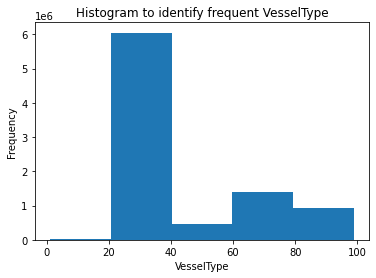

In [26]:
df['VesselType'].plot.hist(bins = 5)
plt.xlabel("VesselType")
plt.title('Histogram to identify frequent VesselType')

In [27]:
df["VesselType"].replace({0: "Not Available", 30: "Fishing", 35:"Military", 
                          (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,23,24,25,26,27,28,29,33,34, 
                           38,39,40,41,42,43,44,45,46,47,48,49,50,51,53,54,55,56,57,58,59, 90,
                           91,92,93,94,95,96,97,98,99):'Other',
                          (60,61,62,63,64,65,66,67,68,69):'Passenger',
                          (70,71,72,73,74,75,76,77,78,79):'Cargo',
                          (36,37):'Pleasure Craft/Sailing',
                          (80,81,82,83,84,85,86,87,88,89):'Tanker',
                          (21,22,31,32,52):'Tug Tow'}, inplace=True)

In [28]:
df.MMSI.unique()

array([367339240, 316020871, 368033750, ..., 565528000, 368926398,
       353706000])

In [29]:
grouped = df.groupby(["MMSI", "VesselType"])

In [30]:
grouped.first()

,,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,Status,Length,Width,Draft,Cargo,TransceiverClass
MMSI,VesselType,,,,,,,,,,,,,,,
112119600,Fishing,2021-09-30T00:03:09,29.25381,-91.80530,2.7,233.5,511.0,TRIPLET PRO;,IMO0000000,WDF9999,NaN,0.0,0.0,NaN,NaN,B
121776489,Pleasure Craft/Sailing,2021-09-30T14:01:51,27.83919,-97.06153,0.0,213.1,511.0,HOOK N BULL,IMO0000000,1216713,NaN,30.0,6.0,NaN,NaN,B
122292919,Other,2021-09-30T11:42:58,32.70573,-117.23506,5.6,167.2,511.0,SD PILOT BOAT,None,WCQ2250,15.0,0.0,0.0,0.0,50.0,A
191283710,Fishing,2021-09-30T03:10:01,40.36268,-69.41593,0.4,211.0,115.0,PYXIS,None,None,7.0,30.0,10.0,0.0,30.0,A
200000000,Fishing,2021-09-30T00:02:51,29.79534,-93.32524,2.2,273.8,511.0,SOUTHERN NIGHTS,IMO0000000,None,1.0,9.0,0.0,0.0,31.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982496664,Pleasure Craft/Sailing,2021-09-30T01:08:49,32.60678,-117.20615,8.6,337.6,511.0,ECLIPSE TENDER 11,IMO0000000,9HXC9,NaN,22.0,22.0,NaN,NaN,B
983192150,Pleasure Craft/Sailing,2021-09-30T21:17:17,19.62930,-156.00433,2.1,216.2,511.0,ES T2,IMO0000000,ZGEM2,NaN,6.0,2.0,NaN,NaN,B
985226000,Tug Tow,2021-09-30T00:02:10,29.77346,-91.16711,0.0,96.0,511.0,BASE,None,WRMN266,15.0,0.0,10.0,0.0,91.0,A


In [31]:
grouped.last()

,,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,Status,Length,Width,Draft,Cargo,TransceiverClass
MMSI,VesselType,,,,,,,,,,,,,,,
112119600,Fishing,2021-09-30T20:12:30,29.24704,-92.10907,3.2,286.0,511.0,TRIPLET PRO;,IMO0000000,WDF9999,NaN,0.0,0.0,NaN,NaN,B
121776489,Pleasure Craft/Sailing,2021-09-30T14:00:49,27.83919,-97.06153,0.0,213.1,511.0,HOOK N BULL,IMO0000000,1216713,NaN,30.0,6.0,NaN,NaN,B
122292919,Other,2021-09-30T21:31:16,32.69666,-117.23227,10.2,358.7,511.0,SD PILOT BOAT,None,WCQ2250,15.0,0.0,0.0,0.0,50.0,A
191283710,Fishing,2021-09-30T03:10:01,40.36268,-69.41593,0.4,211.0,115.0,PYXIS,None,None,7.0,30.0,10.0,0.0,30.0,A
200000000,Fishing,2021-09-30T23:13:25,29.79544,-93.32500,1.0,101.9,511.0,SOUTHERN NIGHTS,IMO0000000,None,1.0,9.0,0.0,0.0,31.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982496664,Pleasure Craft/Sailing,2021-09-30T01:52:48,32.70948,-117.23500,0.0,168.1,511.0,ECLIPSE TENDER 11,IMO0000000,9HXC9,NaN,22.0,22.0,NaN,NaN,B
983192150,Pleasure Craft/Sailing,2021-09-30T22:48:58,19.63068,-156.00320,0.2,360.0,511.0,ES T2,IMO0000000,ZGEM2,NaN,6.0,2.0,NaN,NaN,B
985226000,Tug Tow,2021-09-30T23:48:50,29.77347,-91.16713,0.0,35.3,511.0,BASE,None,WRMN266,15.0,0.0,10.0,0.0,91.0,A


In [32]:
grp_military= df.groupby('VesselType')
grp_military.get_group('Military')

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
339,368926054,2021-09-30T00:00:02,32.66464,-117.12278,0.0,133.8,511.0,US_GOVT_VSL_1000,NaN,-------,Military,0.0,182.0,25.0,0.0,35.0,A
498,369970320,2021-09-30T00:00:43,38.98243,-76.46741,0.0,228.4,511.0,YP 694,IMO0000000,NGFO,Military,NaN,32.0,10.0,NaN,NaN,B
539,368926317,2021-09-30T00:00:00,24.72027,-80.58130,23.8,63.9,65.0,USNS NEWPORT,IMO9851098,NNPT,Military,0.0,103.0,29.0,3.5,35.0,A
1050,316012046,2021-09-30T00:00:06,48.43116,-123.42961,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
1863,338070397,2021-09-30T00:00:06,32.97137,-118.43473,3.1,126.1,123.0,ACOUSTIC EXPLORER,IMO600000000,NS 8801,Military,0.0,41.0,10.0,3.2,35.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9086057,369970320,2021-09-30T23:53:15,38.98231,-76.46667,0.0,232.0,511.0,YP 694,IMO0000000,NGFO,Military,NaN,32.0,10.0,NaN,NaN,B
9086157,369970315,2021-09-30T23:54:06,38.98233,-76.46692,0.0,234.8,511.0,YP 689,IMO0000000,NVGW,Military,NaN,32.0,10.0,NaN,NaN,B
9088500,316012046,2021-09-30T23:57:25,48.43117,-123.42960,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
9089616,369970762,2021-09-30T23:49:48,32.68703,-117.23596,0.0,234.4,246.0,RSC-1,NaN,NaN,Military,5.0,NaN,NaN,NaN,35.0,A


In [33]:
grp_military.MMSI.unique()

VesselType
Cargo                     [371718000, 636017994, 316026694, 232013520, 3...
Fishing                   [366896490, 368565000, 316005667, 367488280, 3...
Military                  [368926054, 369970320, 368926317, 316012046, 3...
Other                     [366994920, 368021840, 366605000, 367634360, 3...
Passenger                 [367704260, 367324580, 368082970, 366917530, 3...
Pleasure Craft/Sailing    [368033750, 338329872, 338400879, 368203210, 3...
Tanker                    [636019638, 636013274, 374940000, 355147000, 5...
Tug Tow                   [367339240, 316020871, 367745820, 367394940, 3...
Name: MMSI, dtype: object

In [34]:
grp1 = df.groupby(['MMSI','VesselType'])
aggregate =grp1.agg({'VesselType' : 'count'})

In [35]:
aggregate

,,VesselType
MMSI,VesselType,
112119600,Fishing,66
121776489,Pleasure Craft/Sailing,2
122292919,Other,248
191283710,Fishing,1
200000000,Fishing,711
...,...,...
982496664,Pleasure Craft/Sailing,65
983192150,Pleasure Craft/Sailing,6
985226000,Tug Tow,1224


In [36]:
df[df['MMSI']== 316012046].groupby('VesselType').size()

VesselType
Military    1208
dtype: int64

In [37]:
df.groupby(["MMSI", "VesselType"]).get_group((316012046, 'Military'))

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
1050,316012046,2021-09-30T00:00:06,48.43116,-123.42961,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
3781,316012046,2021-09-30T00:01:07,48.43117,-123.42960,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
5494,316012046,2021-09-30T00:02:15,48.43117,-123.42960,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
12309,316012046,2021-09-30T00:03:25,48.43118,-123.42960,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
19705,316012046,2021-09-30T00:04:37,48.43118,-123.42960,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051679,316012046,2021-09-30T23:12:55,48.43117,-123.42959,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
9060928,316012046,2021-09-30T23:22:45,48.43117,-123.42961,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
9076267,316012046,2021-09-30T23:41:46,48.43117,-123.42961,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A
9088500,316012046,2021-09-30T23:57:25,48.43117,-123.42960,0.0,0.0,511.0,CFAV TILLICUM,NaN,CFA2615,Military,0.0,17.0,7.0,0.0,35.0,A


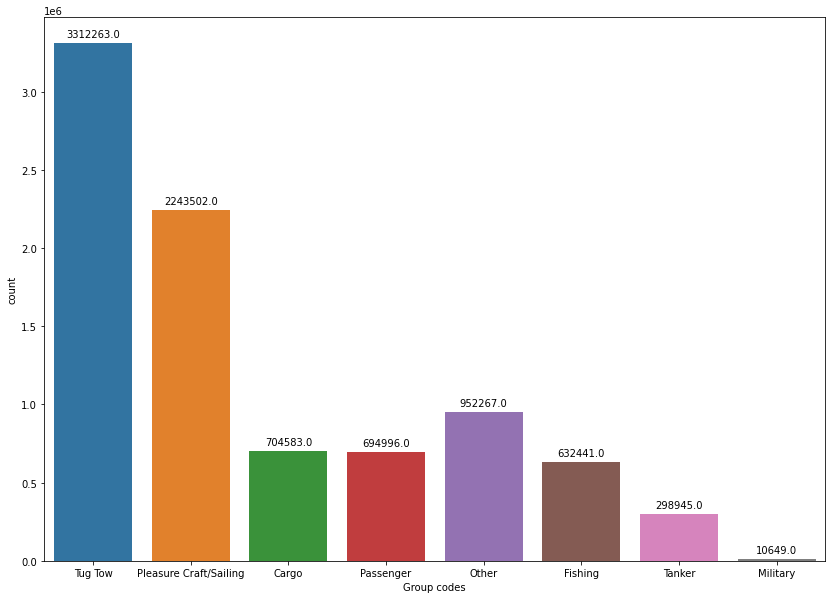

In [38]:
plt.figure(figsize=(14, 10))
ax= sns.countplot(x='VesselType', data=df)
ax.set_xlabel("Group codes", fontsize = 10)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

In [39]:
df = df.drop_duplicates()

In [40]:
df.groupby([df['MMSI']]).agg({'count'})

,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count,count
MMSI,,,,,,,,,,,,,,,,
112119600,66,66,66,66,66,66,66,66,66,66,0,66,66,0,0,66
121776489,2,2,2,2,2,2,2,2,2,2,0,2,2,0,0,2
122292919,248,248,248,248,248,248,248,0,248,248,248,248,248,248,248,248
191283710,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1
200000000,711,711,711,711,711,711,711,711,0,711,59,711,711,711,711,711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
982496664,65,65,65,65,65,65,65,65,65,65,0,65,65,0,0,65
983192150,6,6,6,6,6,6,6,6,6,6,0,6,6,0,0,6


In [41]:
invalid_entries=[111111111,222222222,333333333,444444444,555555555,666666666,777777777,888888888,999999999, 123456789, 987654321]
invalid = df[df.MMSI.isin(invalid_entries)]
invalid

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass


In [42]:
df = df.drop(invalid.index, axis=0)

In [43]:
df

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
0,367339240,2021-09-30T00:00:02,36.99416,-89.15366,0.3,350.0,328.0,SHERRYL B REEVES,NaN,WDE3451,Tug Tow,12.0,48.0,12.0,NaN,57.0,A
1,316020871,2021-09-30T00:00:02,48.70558,-123.54449,0.0,61.4,109.0,SEASPAN EAGLE,IMO9432971,CFN6642,Tug Tow,0.0,28.0,12.0,5.3,32.0,A
2,368033750,2021-09-30T00:00:02,38.96336,-76.48107,0.0,360.0,281.0,OCEANAIRE,IMO0000000,WDK2245,Pleasure Craft/Sailing,NaN,16.0,4.0,NaN,NaN,B
3,338329872,2021-09-30T00:00:04,41.63435,-71.21239,0.0,360.0,511.0,POR-SHA,IMO0000000,NaN,Pleasure Craft/Sailing,NaN,10.0,3.0,NaN,NaN,B
4,338400879,2021-09-30T00:00:04,42.37885,-87.80212,12.7,202.1,511.0,LADY B,IMO0000000,NaN,Pleasure Craft/Sailing,NaN,17.0,5.0,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106173,338926439,2021-09-30T22:50:57,13.42388,144.66368,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,Other,0.0,44.0,8.0,0.0,90.0,A
9106174,338926439,2021-09-30T22:59:07,13.42386,144.66368,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,Other,0.0,44.0,8.0,0.0,90.0,A
9106175,338926439,2021-09-30T23:29:57,13.42385,144.66368,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,Other,0.0,44.0,8.0,0.0,90.0,A
9106176,338926439,2021-09-30T23:46:26,13.42386,144.66367,0.0,125.1,326.0,CGC MYRTLE HAZARD,NaN,NMHD,Other,0.0,44.0,8.0,0.0,90.0,A


In [44]:
df.to_csv(path + 'ais_data_version2.csv')